In [1]:
import pandas as pd
df = pd.read_csv('DOGEUSDT_2020-11-19_2024-11-19_INTERVAL_15MINUTE.csv')
# df.drop(['Close Time', 'Ignore', 'Open', 'Close'], axis=1, inplace=True)

1. Volume:

    Это общее количество DOGE, которое было куплено и продано за данный временной интервал.
    - Измеряется в базовом активе (DOGE).

2. Quote Asset Volume:

    Это объем в котируемой валюте (USDT), эквивалентный проторгованному объему базового актива.\
    Вычисляется как:
    - Quote Asset Volume = Volume × Средняя цена сделки за интервал

3. Taker Buy Base Asset Volume:

    - Это объем базового актива, который был куплен с использованием ордеров типа "Taker" (рыночных ордеров).

4. Taker Buy Quote Asset Volume:
    - Это объем котируемой валюты, потраченной на покупку базового актива ордерами "Taker". 

Мультиколлинеарность — это ситуация, когда независимые переменные в регрессионной модели сильно коррелируют между собой. Это может вызывать проблемы с интерпретацией модели и снижать точность оценки коэффициентов. Вот несколько методов борьбы с мультиколлинеарностью:

### 1. **Удаление одной из коррелирующих переменных**
   - Если две или более переменные сильно коррелируют, одну из них можно удалить, особенно если она менее значима для модели.
   - Для выбора можно использовать корреляционную матрицу или анализ значимости переменных.

### 2. **Проведение главных компонент (PCA)**
   - Метод главных компонент (Principal Component Analysis) позволяет преобразовать исходные переменные в новую систему координат, где компоненты некоррелированы.
   - Это полезно, когда переменных много, и они сильно коррелируют между собой.

### 3. **Ридж-регрессия (Ridge Regression)**
   - Этот метод добавляет штраф за большие коэффициенты регрессии, что помогает справляться с мультиколлинеарностью.
   - Используется, если модель должна сохранять все переменные.

### 4. **Лассо-регрессия (Lasso Regression)**
   - Lasso регрессия также добавляет штраф, но она может полностью исключать некоторые коэффициенты, обнуляя их, что может быть полезно для отбора переменных.

### 5. **Объединение переменных**
   - Если коррелирующие переменные имеют схожий смысл, их можно объединить в одну. Например, можно вычислить их среднее значение или создать композитный индекс.

### 6. **Увеличение объема данных**
   - Увеличение количества наблюдений может уменьшить влияние мультиколлинеарности, если это возможно.

### 7. **Проверка Variance Inflation Factor (VIF)**
   - Рассчитайте VIF для каждой переменной. Если VIF значительно превышает 10, это указывает на сильную мультиколлинеарность.
   - Удалите переменные с высоким VIF или примите меры для снижения корреляции.

### 8. **Использование специализированных методов моделирования**
   - Например, Partial Least Squares (PLS), который хорошо работает в условиях мультиколлинеарности.

### 9. **Нелинейное моделирование**
   - Иногда мультиколлинеарность можно обойти, используя модели, которые учитывают нелинейные связи, например, деревья решений или нейронные сети.

Важно помнить, что выбор метода зависит от конкретной задачи, типа данных и целей анализа.

На Binance параметры, которые возвращаются, относятся к активности торговли, и их нужно правильно интерпретировать. Давайте разберем:

### Параметры:
1. **Volume**: общий объём торгов базового актива (например, BTC).
2. **Quote Asset Volume**: общий объём торгов в котируемом активе (например, USDT).
3. **Number of Trades**: количество сделок за период.
4. **Taker Buy Base Asset Volume**: объём базового актива, купленный `taker`.
5. **Taker Buy Quote Asset Volume**: объём котируемого актива, использованный для покупки базового актива `taker`.

### Кто такие **taker** и **maker**?
- **Taker** — участник, который исполняет существующий ордер из книги заявок (т.е. забирает ликвидность). Например, покупка или продажа по рыночной цене.
- **Maker** — участник, который добавляет новый лимитный ордер в книгу заявок (т.е. добавляет ликвидность).

### Как найти продавцов?
Если вы хотите определить количество продавцов, то нужно учесть следующее:
- **Taker Buy Base Asset Volume** показывает объём базового актива, купленный `taker`.
- Соответственно, это сделки, где `taker` покупал, а **продавцом был `maker`**.

Таким образом:
- **Объём продавцов** можно найти как разницу между общим объёмом (Volume) и объёмом `Taker Buy Base Asset Volume`:
  \[
  \text{Объём продавцов (по `taker`)} = \text{Volume} - \text{Taker Buy Base Asset Volume}.
  \]

Это будет объём базового актива, который продали `taker`.

---

Если нужно конкретно определить **количество продавцов** (в штуках):
- Binance не предоставляет прямой информации о ролях участников в `Number of Trades`.
- Однако вы можете приблизительно оценить это через пропорцию объёмов. Например:
  \[
  \text{Количество сделок продавцов} = \text{Number of Trades} \times \frac{\text{Volume} - \text{Taker Buy Base Asset Volume}}{\text{Volume}}.
  \]

**Итог**:
- Если вы рассматриваете `Taker Buy Base Asset Volume`, это сделки, где покупатели выступают как `taker`, а продавцами были `maker`.
- Для оценки объёма продавцов используйте разницу: \(\text{Volume} - \text{Taker Buy Base Asset Volume}\).

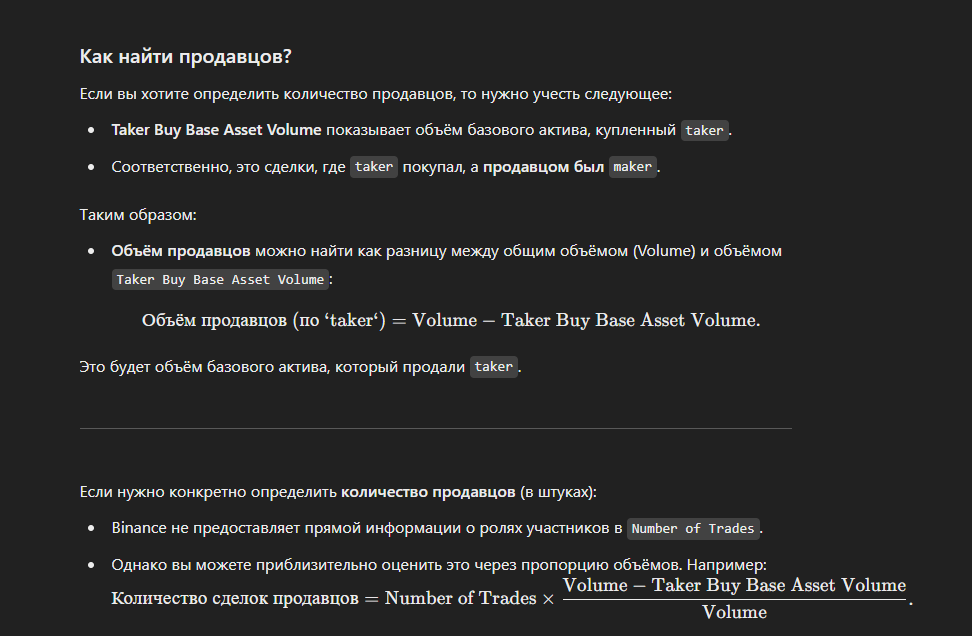

In [2]:
df.head()

,Open time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,Ignore
0,2020-11-19 19:00:00,0.002931,0.002934,0.002896,0.002904,19760566.0,1605813299999,57614.417807,505,4176342.0,12142.156017,0
1,2020-11-19 19:15:00,0.002909,0.002913,0.002890,0.002898,7715960.0,1605814199999,22327.291478,114,5646231.0,16335.192524,0
2,2020-11-19 19:30:00,0.002900,0.002911,0.002897,0.002911,6004543.0,1605815099999,17439.155566,67,2030787.0,5898.155289,0
3,2020-11-19 19:45:00,0.002910,0.002917,0.002907,0.002916,1476961.0,1605815999999,4300.449462,28,1021437.0,2975.096665,0
4,2020-11-19 20:00:00,0.002910,0.002910,0.002900,0.002902,7644641.0,1605816899999,22187.315007,81,4592669.0,13323.285198,0


In [3]:
df['Taker Sell Base Asset Volume'] = df['Volume'] - df['Taker Buy Base Asset Volume']
df['seller_trades'] = round(df['Number of Trades'] * (df['Taker Sell Base Asset Volume'] / df['Volume']))
df['buer_trades'] = df['Number of Trades'] - df['seller_trades']
df['Taker Sell Quote Asset Volume'] = df['Quote Asset Volume'] - df['Taker Buy Quote Asset Volume']
df.head()

,Open time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,Ignore,Taker Sell Base Asset Volume,seller_trades,buer_trades,Taker Sell Quote Asset Volume
0,2020-11-19 19:00:00,0.002931,0.002934,0.002896,0.002904,19760566.0,1605813299999,57614.417807,505,4176342.0,12142.156017,0,15584224.0,398.0,107.0,45472.261790
1,2020-11-19 19:15:00,0.002909,0.002913,0.002890,0.002898,7715960.0,1605814199999,22327.291478,114,5646231.0,16335.192524,0,2069729.0,31.0,83.0,5992.098954
2,2020-11-19 19:30:00,0.002900,0.002911,0.002897,0.002911,6004543.0,1605815099999,17439.155566,67,2030787.0,5898.155289,0,3973756.0,44.0,23.0,11541.000277
3,2020-11-19 19:45:00,0.002910,0.002917,0.002907,0.002916,1476961.0,1605815999999,4300.449462,28,1021437.0,2975.096665,0,455524.0,9.0,19.0,1325.352797
4,2020-11-19 20:00:00,0.002910,0.002910,0.002900,0.002902,7644641.0,1605816899999,22187.315007,81,4592669.0,13323.285198,0,3051972.0,32.0,49.0,8864.029809


Путем работы с даными, получили следущие стобцы:\
- Volume - общее колличесыто купленных монет (DOG)
- Taker Buy Base Asset Volume - объем рыночных заявок  на покупку
- Taker Sell Base Asset Volume - объем рыночных заявок  на продажу\
===================
- Quote Asset Volume - общее колличесыто ковертируемой валюты USDT
- Taker Buy Quote Asset Volume	- объем рыночных заявок  на покупку, потраченые USDT
- Taker Sell Quote Asset Volume - объем рыночных заявок  на продажу в USDT\
===================
- Number of Trades - общее колличесвто сделок
- seller_trades - примерное колличесвто заявок на продажу
- buer_trades - примерное колличесвто заявок на покупку\
====================\
Volume, Quote Asset Volume, Number of Trades - не нужные переменные. Они дублируют информацию и не несут смысловой нагрузки

Для анализа изменения цены и оценки её волатильности можно использовать несколько подходов. Давайте рассмотрим это шаг за шагом.

---

### 1. **Измерение роста/снижения цены (в процентах)**
Обычно изменение цены рассчитывается по отношению к значению **Open** (цены открытия) и **Close** (цены закрытия):

\[
\text{Изменение цены (\%)} = \frac{\text{Close} - \text{Open}}{\text{Open}} \times 100
\]

**Пример**:
- Если `Open = 100` и `Close = 110`, то:
\[
\text{Изменение} = \frac{110 - 100}{100} \times 100 = 10\%
\]
- Если `Close = 90`, то:
\[
\text{Изменение} = \frac{90 - 100}{100} \times 100 = -10\%
\]

---

### 2. **Учет размаха (разброса) цены**
Чтобы учесть волатильность (разброс) цены, можно использовать разницу между **High** (максимальная цена) и **Low** (минимальная цена). 

#### Абсолютный размах:
\[
\text{Размах} = \text{High} - \text{Low}
\]

#### Размах в процентах относительно цены открытия:
\[
\text{Размах (\%)} = \frac{\text{High} - \text{Low}}{\text{Open}} \times 100
\]

Этот показатель покажет, насколько сильно цена колебалась за период.

---

### 3. **Комбинированный анализ**
Вы можете сочетать оба показателя:
- Использовать изменение **Open/Close** для оценки тренда (рост или падение).
- Использовать размах (\(High/Low\)) для оценки волатильности.

---

### Пример расчёта:
Для строки, где:
- **Open** = 100
- **Close** = 110
- **High** = 115
- **Low** = 95

Рассчитаем:
1. Изменение цены:
\[
\text{Изменение цены (\%)} = \frac{110 - 100}{100} \times 100 = 10\%
\]
2. Размах:
\[
\text{Размах (\%)} = \frac{115 - 95}{100} \times 100 = 20\%
\]

---

Если хотите, я могу рассчитать эти значения для ваших данных. Напишите, если нужно!

In [4]:
df['Range'] = (df['High'] - df['Low'])/df['Open']
df['target'] =(df['Close'] - df['Open'])/df['Open']
df.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Number of Trades', 'Quote Asset Volume', 'Ignore'], axis=1, inplace=True)

In [5]:
df.head(1)

,Open time,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,Taker Sell Base Asset Volume,seller_trades,buer_trades,Taker Sell Quote Asset Volume,Range,target
0,2020-11-19 19:00:00,4176342.0,12142.156017,15584224.0,398.0,107.0,45472.26179,0.012929,-0.009279


отлично, ряд подготовлена, теперь давайте исследуем ряд

# Анализ ряда 

In [6]:
import matplotlib.pyplot as plt
df_work = df.copy()
y = df['target']
df_work.drop('target', inplace=True, axis=1)
df_work.head(1)

,Open time,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,Taker Sell Base Asset Volume,seller_trades,buer_trades,Taker Sell Quote Asset Volume,Range
0,2020-11-19 19:00:00,4176342.0,12142.156017,15584224.0,398.0,107.0,45472.26179,0.012929


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

# Пример структуры данных
# Убедимся, что 'Open time' преобразован в datetime
df_work['Open time'] = pd.to_datetime(df_work['Open time'])
df_work.set_index('Open time', inplace=True)


In [8]:

# Создаем виджеты для выбора диапазона
start_date = widgets.DatePicker(description="Start Date")
end_date = widgets.DatePicker(description="End Date")

# Функция для фильтрации и построения графика
def plot_filtered_data(start_date, end_date):
    # Проверяем, выбраны ли даты
    if start_date is None or end_date is None:
        print("Пожалуйста, выберите диапазон дат.")
        return

    # Фильтруем данные по выбранному диапазону
    filtered_df = df_work.loc[start_date:end_date]

    # Проверяем, есть ли данные в указанном диапазоне
    if filtered_df.empty:
        print("Нет данных в выбранном диапазоне.")
        return

    # Строим графики
    plt.figure(figsize=(14, 8))

    # Линейный график объемов (Taker Buy и Taker Sell)
    plt.plot(filtered_df.index, filtered_df['Taker Buy Base Asset Volume'], label='Taker Buy Base Asset Volume DOG', linewidth=1)
    plt.plot(filtered_df.index, filtered_df['Taker Sell Base Asset Volume'], label='Taker Sell Base Asset Volume DOG', linewidth=1)

    # Добавим график для Range
    # plt.plot(filtered_df.index, filtered_df['Range'], label='Range', linestyle='--', alpha=0.7)

    # Настройка графика
    plt.title('Временные ряды торговли (фильтрованный диапазон)', fontsize=16)
    plt.xlabel('Время', fontsize=12)
    plt.ylabel('Объем', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Построим график для сделок покупателей и продавцов
    plt.figure(figsize=(14, 6))
    plt.plot(filtered_df.index, filtered_df['seller_trades'], label='Seller Trades', linewidth=1.5, color='red')
    plt.plot(filtered_df.index, filtered_df['buer_trades'], label='Buyer Trades', linewidth=1.5, color='green')

    # Настройка
    plt.title('Количество сделок (фильтрованный диапазон)', fontsize=16)
    plt.xlabel('Время', fontsize=12)
    plt.ylabel('Количество сделок', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()


       # Построим график для сделок покупателей и продавцов
    plt.figure(figsize=(14, 6))
    plt.plot(filtered_df.index, filtered_df['Taker Buy Quote Asset Volume'], label='Taker Buy Quote Asset USDT', linewidth=1.5, color='red')
    plt.plot(filtered_df.index, filtered_df['Taker Sell Quote Asset Volume'], label='Taker Sell Quote Asset USDT', linewidth=1.5, color='green')

    # Настройка
    plt.title('Количество сделок (фильтрованный диапазон)', fontsize=16)
    plt.xlabel('Время', fontsize=12)
    plt.ylabel('Количество сделок', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()


# Связываем виджеты и функцию
interact(plot_filtered_data, start_date=start_date, end_date=end_date)


interactive(children=(DatePicker(value=None, description='Start Date', step=1), DatePicker(value=None, descrip…

<function __main__.plot_filtered_data(start_date, end_date)>

In [9]:
# проверка на стационарность  Проверка стационарности (тест Дики-Фуллера)
from statsmodels.tsa.stattools import adfuller
alpha = 0.05
for col in df_work.columns:
    result = adfuller(df_work[col].dropna())
    p_value = result[1]
    answer = 'Стационарен' if p_value < alpha else 'Не стационарен'
    print(f'{col}: p-value = {answer}')


Taker Buy Base Asset Volume: p-value = Стационарен
Taker Buy Quote Asset Volume: p-value = Стационарен
Taker Sell Base Asset Volume: p-value = Стационарен
seller_trades: p-value = Стационарен
buer_trades: p-value = Стационарен
Taker Sell Quote Asset Volume: p-value = Стационарен
Range: p-value = Стационарен


In [10]:
df_work.corr()

,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,Taker Sell Base Asset Volume,seller_trades,buer_trades,Taker Sell Quote Asset Volume,Range
Taker Buy Base Asset Volume,1.000000,0.596114,0.984954,0.620058,0.629956,0.584401,0.818995
Taker Buy Quote Asset Volume,0.596114,1.000000,0.585846,0.937444,0.951436,0.983607,0.602569
Taker Sell Base Asset Volume,0.984954,0.585846,1.000000,0.630948,0.617807,0.594039,0.825065
seller_trades,0.620058,0.937444,0.630948,1.000000,0.980993,0.950808,0.675208
buer_trades,0.629956,0.951436,0.617807,0.980993,1.000000,0.931957,0.667069
Taker Sell Quote Asset Volume,0.584401,0.983607,0.594039,0.950808,0.931957,1.000000,0.606705
Range,0.818995,0.602569,0.825065,0.675208,0.667069,0.606705,1.000000


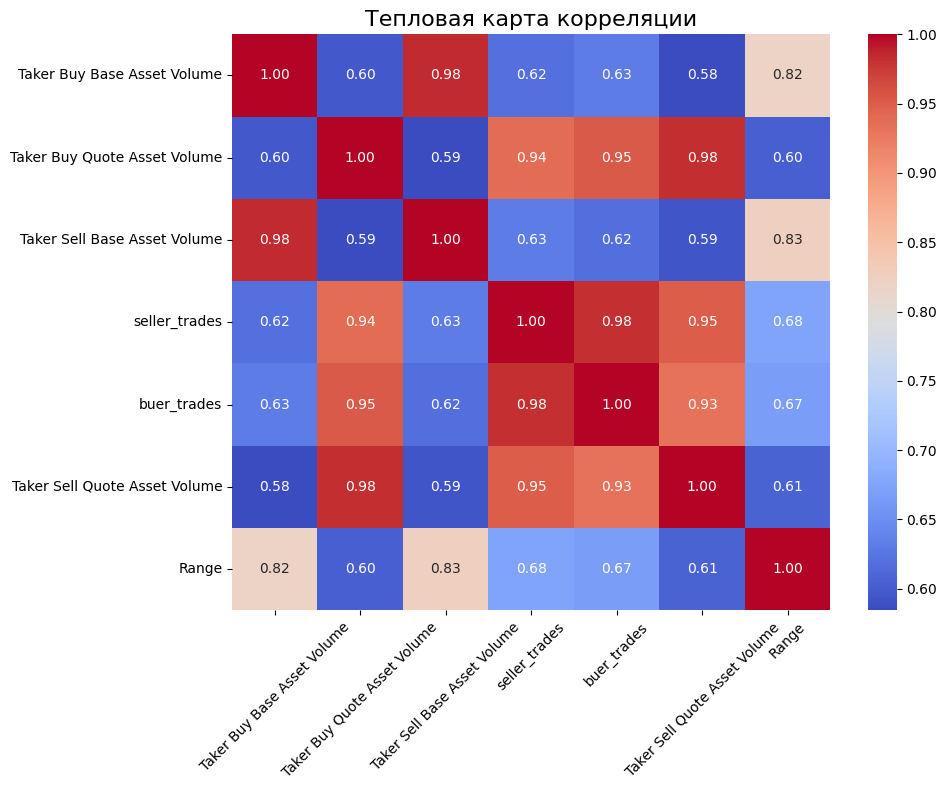

In [11]:
import seaborn as sns

# Вычисление корреляционной матрицы
correlation_matrix = df_work.corr()

# Построение тепловой карты
plt.figure(figsize=(10, 8))  # Размер графика
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Настройка графика
plt.title("Тепловая карта корреляции", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Отображение графика
plt.show()

In [12]:
# from scipy.stats import boxcox
# transformed_columns = {}
# lambda_values = {}

# for col in df_work.columns:
#     if df_work[col].min() > 0:  # Box-Cox работает только с положительными значениями
#         transformed_columns[col], lambda_values[col] = boxcox(df_work[col].dropna())
#         print(f'{col}: λ = {lambda_values[col]}')
#     else:
#         print(f'{col}: содержит нулевые или отрицательные значения, не применяется преобразование Бокса-Кокса.')


In [13]:
(df_work + 1)

,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,Taker Sell Base Asset Volume,seller_trades,buer_trades,Taker Sell Quote Asset Volume,Range
Open time,,,,,,,
2020-11-19 19:00:00,4176343.0,1.214316e+04,15584225.0,399.0,108.0,4.547326e+04,1.012929
2020-11-19 19:15:00,5646232.0,1.633619e+04,2069730.0,32.0,84.0,5.993099e+03,1.007804
2020-11-19 19:30:00,2030788.0,5.899155e+03,3973757.0,45.0,24.0,1.154200e+04,1.005138
2020-11-19 19:45:00,1021438.0,2.976097e+03,455525.0,10.0,20.0,1.326353e+03,1.003265
2020-11-19 20:00:00,4592670.0,1.332429e+04,3051973.0,33.0,50.0,8.865030e+03,1.003471
...,...,...,...,...,...,...,...
2024-11-19 17:45:00,19638355.0,7.850965e+06,24564576.0,24505.0,19591.0,9.817115e+06,1.011814
2024-11-19 18:00:00,39547653.0,1.595750e+07,24643486.0,19731.0,31663.0,9.940602e+06,1.012877
2024-11-19 18:15:00,107793034.0,4.410524e+07,66826117.0,47215.0,76159.0,2.731814e+07,1.018422


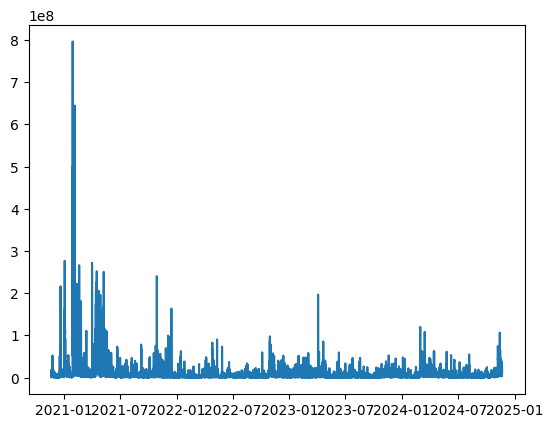

In [14]:
rolling_std = (df_work['Taker Sell Base Asset Volume'] + 1).rolling(window=12).std()
plt.plot(rolling_std)


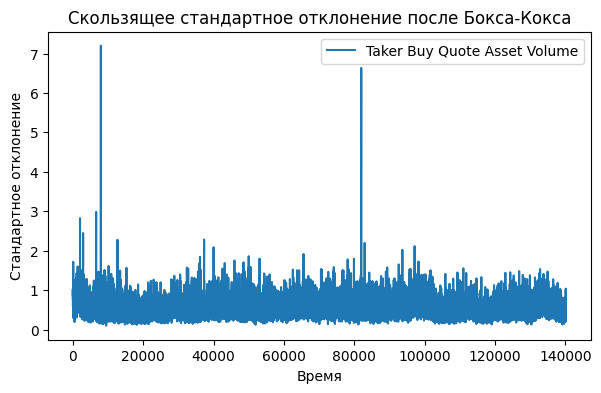

In [15]:
from scipy.stats import boxcox
import pandas as pd
import matplotlib.pyplot as plt
name = 'Taker Buy Quote Asset Volume'
# Применяем преобразование Бокса-Кокса
transformed_data, lambda_value = boxcox(df_work[name] + 1)

# Создаем Series из преобразованных данных (для использования rolling())
transformed_series = pd.Series(transformed_data)

# Вычисляем скользящее стандартное отклонение
rolling_std = transformed_series.rolling(window=12).std()

# Визуализация
plt.figure(figsize=(7, 4))
plt.plot(rolling_std, label=name)
plt.title("Скользящее стандартное отклонение после Бокса-Кокса")
plt.xlabel("Время")
plt.ylabel("Стандартное отклонение")
plt.legend()
plt.show()


# Создадим 2 датасета. 
Без преобразования Бокса-кокса и с преобразованием 

In [24]:
from scipy.stats import boxcox
import pandas as pd
from typing import Tuple

def create_dataset(df: pd.DataFrame, box_cox: bool) -> Tuple[pd.DataFrame, pd.Series, dict]:
    # Вычисляем дополнительные колонки
    df['Taker Sell Base Asset Volume'] = df['Volume'] - df['Taker Buy Base Asset Volume']
    df['seller_trades'] = round(df['Number of Trades'] * (df['Taker Sell Base Asset Volume'] / df['Volume']))
    df['buer_trades'] = df['Number of Trades'] - df['seller_trades']
    df['Taker Sell Quote Asset Volume'] = df['Quote Asset Volume'] - df['Taker Buy Quote Asset Volume']
    df['Range'] = (df['High'] - df['Low']) / df['Open']
    df['Open time'] = pd.to_datetime(df['Open time'])
    df.set_index('Open time', inplace=True)
    target = (df['Close'] - df['Open']) / df['Open']
    
    # Удаляем ненужные колонки
    df.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 
             'Number of Trades', 'Quote Asset Volume', 'Ignore'], 
            axis=1, inplace=True)
    lambda_values = None
    # Преобразование Бокса-Кокса (если boxcox=True)
    if box_cox:
        # Создаем новую таблицу для хранения преобразованных данных
        transformed_data = {}
        lambda_values = {}
        df = df + 1

        # Проходим по каждому столбцу, применяя Box-Cox, если значения > 0
        for column in df.columns:
            if column not in ['seller_trades', 'buer_trades', 'Range']:
            
                # Применяем Box-Cox к колонке
                transformed_data[column], lambda_values[column] = boxcox(df[column])
            else:
                transformed_data[column], lambda_values[column] = df[column], 0
        
        # Преобразуем обратно в DataFrame
        df = pd.DataFrame(transformed_data, columns=df.columns, index=df.index)
        
        # print("Оптимальные значения λ для каждой колонки:")
        # for col, lamb in lambda_values.items():
        #     print(f"{col}: λ = {lamb}")
        if lambda_values != None:

            return df, target, lambda_values
        
    return df, target

df = pd.read_csv('DOGEUSDT_2020-11-19_2024-11-19_INTERVAL_15MINUTE.csv')

df, y, λ = create_dataset(df, True)
df['target']= y 
df.head()

,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,Taker Sell Base Asset Volume,seller_trades,buer_trades,Taker Sell Quote Asset Volume,Range,target
Open time,,,,,,,,
2020-11-19 19:00:00,11.328721,9.287782,11.663945,399.0,108.0,10.688172,1.012929,-0.009279
2020-11-19 19:15:00,11.488909,9.576951,10.663056,32.0,84.0,8.674207,1.007804,-0.003644
2020-11-19 19:30:00,10.937568,8.582997,10.996472,45.0,24.0,9.325818,1.005138,0.003897
2020-11-19 19:45:00,10.553809,7.913823,9.850434,10.0,20.0,7.173677,1.003265,0.002027
2020-11-19 20:00:00,11.379414,9.378298,10.862750,33.0,50.0,9.063492,1.003471,-0.002715


In [26]:
df = pd.read_csv('DOGEUSDT_2020-11-19_2024-11-19_INTERVAL_15MINUTE.csv')
df, y = create_dataset(df, False)
df['target']= y
df.to_csv('DOG_15MIN_NO_BOXCOX.CSV', index=True)
df.head()


,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,Taker Sell Base Asset Volume,seller_trades,buer_trades,Taker Sell Quote Asset Volume,Range,target
Open time,,,,,,,,
2020-11-19 19:00:00,4176342.0,12142.156017,15584224.0,398.0,107.0,45472.261790,0.012929,-0.009279
2020-11-19 19:15:00,5646231.0,16335.192524,2069729.0,31.0,83.0,5992.098954,0.007804,-0.003644
2020-11-19 19:30:00,2030787.0,5898.155289,3973756.0,44.0,23.0,11541.000277,0.005138,0.003897
2020-11-19 19:45:00,1021437.0,2975.096665,455524.0,9.0,19.0,1325.352797,0.003265,0.002027
2020-11-19 20:00:00,4592669.0,13323.285198,3051972.0,32.0,49.0,8864.029809,0.003471,-0.002715


In [27]:

df = pd.read_csv('DOGEUSDT_2020-11-19_2024-11-19_INTERVAL_15MINUTE.csv')
df, y, λ = create_dataset(df, True)
df['target']= y
df.to_csv('DOG_15MIN_BOXCOX.CSV', index=True)
df.head()

,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,Taker Sell Base Asset Volume,seller_trades,buer_trades,Taker Sell Quote Asset Volume,Range,target
Open time,,,,,,,,
2020-11-19 19:00:00,11.328721,9.287782,11.663945,399.0,108.0,10.688172,1.012929,-0.009279
2020-11-19 19:15:00,11.488909,9.576951,10.663056,32.0,84.0,8.674207,1.007804,-0.003644
2020-11-19 19:30:00,10.937568,8.582997,10.996472,45.0,24.0,9.325818,1.005138,0.003897
2020-11-19 19:45:00,10.553809,7.913823,9.850434,10.0,20.0,7.173677,1.003265,0.002027
2020-11-19 20:00:00,11.379414,9.378298,10.862750,33.0,50.0,9.063492,1.003471,-0.002715


In [28]:
λ

{'Taker Buy Base Asset Volume': -0.04108943770295633,
 'Taker Buy Quote Asset Volume': -0.002661893794157021,
 'Taker Sell Base Asset Volume': -0.04513663123550346,
 'seller_trades': 0,
 'buer_trades': 0,
 'Taker Sell Quote Asset Volume': -0.0006397260374988982,
 'Range': 0}



### Когда Бокс-Кокс не нужен:
- **Стационарный ряд**: Если ваши данные уже имеют постоянное среднее и дисперсию, дополнительное преобразование может быть излишним.
- **Выбросы значимы**: Если разброс в начале ряда важен для анализа (например, это результат рыночной активности), преобразование может скрыть эту информацию.
- **Модель не требует нормализации**: Если модель, с которой вы работаете (например, деревья решений или нейронные сети), не чувствительна к масштабу данных, преобразование не нужно.

---

### Когда Бокс-Кокс полезен:
- **Нестабильная дисперсия**: Если дисперсия меняется со временем и мешает анализу, преобразование помогает устранить этот эффект.
- **Требуется нормальное распределение**: Преобразование полезно для моделей, которые предполагают нормальность данных (например, ARIMA или линейная регрессия).
- **Модели плохо справляются с выбросами**: Если выбросы слишком сильно влияют на результаты анализа, Бокс-Кокс помогает их смягчить.

---

### Вывод:
Если данные после преобразования выглядят хуже (меньше информации, больше "сглаживания"), то преобразование действительно может быть неуместным.

### Рекомендация:
- Если ваши данные уже стационарны, как на первом графике, и дисперсия относительно стабильна, **преобразование Бокса-Кокса не требуется**.
- Лучше оставить данные без изменений, если разброс в начале не мешает вашему анализу.

Ваш вывод корректен: в данном случае **преобразование Бокса-Кокса, вероятно, не нужно**.